## 清理訓練數據集

In [1]:
import pandas
train_data_url = 'https://raw.githubusercontent.com/ywchiu/HKPC/master/data/pdm_train.csv'
df_train = pandas.read_csv(train_data_url)

In [2]:
len(df_train)

20631

In [3]:
df_train.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd12,sd13,sd14,sd15,sd16,sd17,sd18,sd19,sd20,sd21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,0.438406,0.035355,5.041671,0.008697,0.0,0.000000,0.0,0.0,0.042426,0.003253
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,0.404475,0.026458,3.717450,0.007640,0.0,1.154701,0.0,0.0,0.055076,0.044573
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,0.495950,0.029439,3.050906,0.028117,0.0,1.000000,0.0,0.0,0.076322,0.037977
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,0.432574,0.025884,2.651326,0.025953,0.0,1.095445,0.0,0.0,0.073621,0.033498


In [4]:
df_train.columns

Index(['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
       's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
       's15', 's16', 's17', 's18', 's19', 's20', 's21', 'last_cycle', 'ttf',
       'label_bnc', 'label_mcc', 'av1', 'av2', 'av3', 'av4', 'av5', 'av6',
       'av7', 'av8', 'av9', 'av10', 'av11', 'av12', 'av13', 'av14', 'av15',
       'av16', 'av17', 'av18', 'av19', 'av20', 'av21', 'sd1', 'sd2', 'sd3',
       'sd4', 'sd5', 'sd6', 'sd7', 'sd8', 'sd9', 'sd10', 'sd11', 'sd12',
       'sd13', 'sd14', 'sd15', 'sd16', 'sd17', 'sd18', 'sd19', 'sd20', 'sd21'],
      dtype='object')

## 決策樹

### 建立訓練數據集的 X & Y

In [5]:
features = ['setting1', 'setting2', 'setting3', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 
            's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 
            's19', 's20', 's21', 'av1', 'av2', 'av3', 'av4', 'av5', 'av6', 'av7', 'av8', 
            'av9', 'av10', 'av11', 'av12', 'av13', 'av14', 'av15', 'av16', 'av17', 'av18', 
            'av19', 'av20', 'av21', 'sd1', 'sd2', 'sd3', 'sd4', 'sd5', 'sd6', 'sd7', 'sd8', 
            'sd9', 'sd10', 'sd11', 'sd12', 'sd13', 'sd14', 'sd15', 'sd16', 'sd17', 'sd18', 
            'sd19', 'sd20', 'sd21']

train_X = df_train[features]
train_y = df_train['label_bnc']

### 建立決策樹

In [6]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 5)
clf.fit(train_X,train_y)

DecisionTreeClassifier(max_depth=5)

In [7]:
from sklearn.tree import export_graphviz
export_graphviz(clf, 'tree.dot')
#! cat tree.dot

### Web Graphviz
- http://www.webgraphviz.com/

### 讀取測試數據集

In [8]:
test_data_url = 'https://raw.githubusercontent.com/ywchiu/HKPC/master/data/pdm_test.csv'
df_test = pandas.read_csv(test_data_url)

### 產生測試數據集的 X & Y

In [9]:
test_X = df_test[features]
test_y = df_test['label_bnc']

### 產生預測結果

In [10]:
pred_y = clf.predict(test_X)

### 評估預測結果

In [11]:
(test_y == pred_y).sum() / len(test_y)

0.89

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(test_y, pred_y)

0.89

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, pred_y)

array([[74,  1],
       [10, 15]])

## 多類別預測案例 (決策樹)

In [14]:
# 建立訓練數據集多類別的 x, y
train_X = df_train[features]
train_y = df_train['label_mcc']

# 建立模型
clf2 = DecisionTreeClassifier(max_depth = 5)
clf2.fit(train_X,train_y)

# 產生測試數據集多類別的 X,y
test_X = df_test[features]
test_y = df_test['label_mcc']


In [15]:
# 產生預測結果
pred_y = clf2.predict(test_X)

# 計算準確率
accuracy_score(test_y, pred_y)

# 計算混淆矩陣
confusion_matrix(test_y, pred_y)

array([[72,  2,  1],
       [ 7,  7,  1],
       [ 0,  2,  8]])

## 邏輯迴歸模型

In [17]:
# 產生 X,y
train_X = df_test[features]
train_y = df_test['label_bnc']

test_X = df_test[features]
test_y = df_test['label_bnc']

# 建立邏輯回歸模型
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(train_X,train_y)

/Users/davidchiu/.pyenv/versions/3.7.3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [18]:
# 產生預測結果
pred_y = clf.predict(test_X)

# 計算準確率
accuracy_score(test_y, pred_y)

# 計算混淆矩陣
confusion_matrix(test_y, pred_y)

array([[73,  2],
       [ 2, 23]])

## SVM

In [19]:
# 建立邏輯回歸模型
from sklearn.svm import SVC
clf = SVC(kernel = 'linear')
clf.fit(train_X,train_y)

# 產生預測結果
pred_y = clf.predict(test_X)

# 計算準確率
accuracy_score(test_y, pred_y)

# 計算混淆矩陣
confusion_matrix(test_y, pred_y)

array([[72,  3],
       [ 3, 22]])

## 隨機森林

In [20]:
# 建立隨機森林
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(train_X,train_y)

# 產生預測結果
pred_y = clf.predict(test_X)

# 計算準確率
accuracy_score(test_y, pred_y)

# 計算混淆矩陣
confusion_matrix(test_y, pred_y)

array([[75,  0],
       [ 0, 25]])

## Gradient Boosting

In [21]:
# 建立Gradient Boosing 分類器
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf.fit(train_X,train_y)

# 產生預測結果
pred_y = clf.predict(test_X)

# 計算準確率
accuracy_score(test_y, pred_y)

# 計算混淆矩陣
confusion_matrix(test_y, pred_y)

array([[75,  0],
       [ 0, 25]])

## 模型評估

### ROC Curve

In [24]:
# 建立邏輯迴歸模型
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
probas_ = clf.fit(train_X, train_y).predict_proba(test_X)
probas_[:, 1]

# 計算 roc curve:, fpr, tpr, threshold
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_y, probas_[:, 1])


/Users/davidchiu/.pyenv/versions/3.7.3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


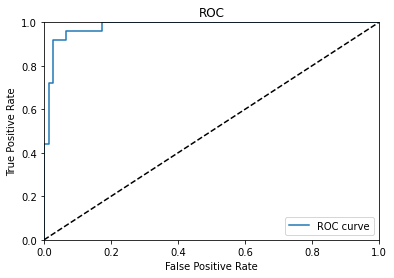

In [25]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()


### 比較不同模型

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


clf1 = DecisionTreeClassifier()
clf1.fit(train_X, train_y)

clf2 = LogisticRegression()
clf2.fit(train_X, train_y)

clf3 = SVC(kernel = 'linear', probability = True)
clf3.fit(train_X, train_y)

clf4 = RandomForestClassifier()
clf4.fit(train_X, train_y)

clf5 = GradientBoostingClassifier()
clf5.fit(train_X, train_y)


/Users/davidchiu/.pyenv/versions/3.7.3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GradientBoostingClassifier()

/Users/davidchiu/.pyenv/versions/3.7.3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


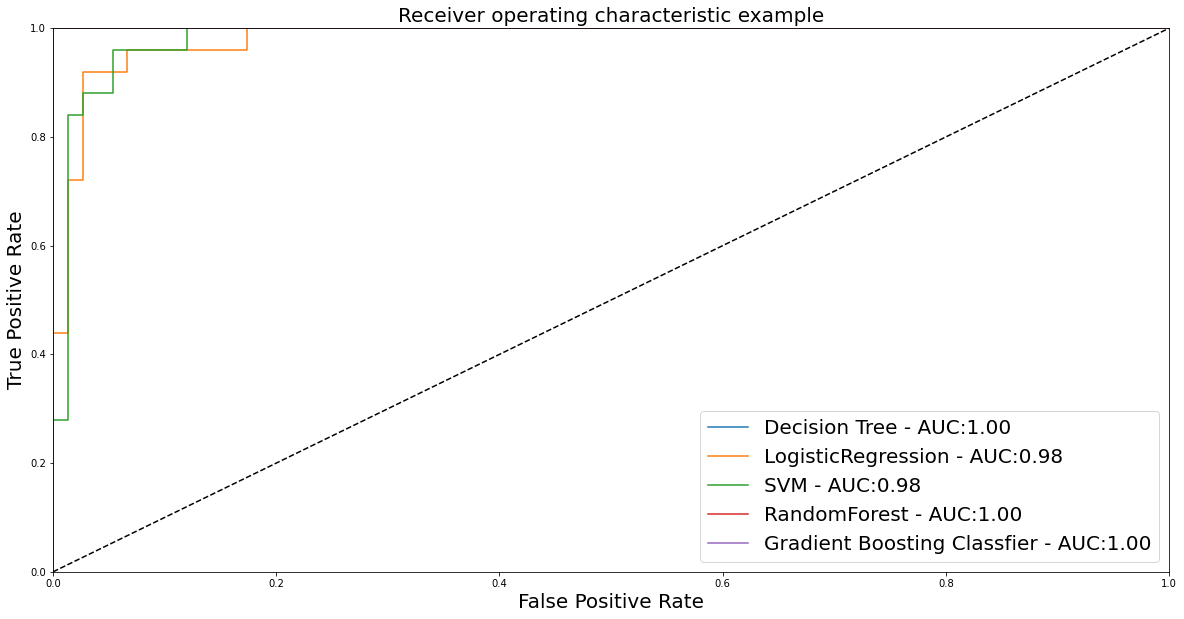

In [27]:
from matplotlib import pyplot as plt
from sklearn.metrics import auc
plt.figure(figsize= [20,10])
for clf, title in zip([clf1,clf2,clf3,clf4,clf5], ['Decision Tree', 'LogisticRegression', 'SVM', 'RandomForest','Gradient Boosting Classfier']):
    probas_ = clf.fit(train_X, train_y).predict_proba(test_X)
    fpr, tpr, thresholds = roc_curve(test_y, probas_[:, 1])
    plt.plot(fpr, tpr, label='%s - AUC:%.2f'%(title, auc(fpr, tpr)) )
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('Receiver operating characteristic example', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.show()
